In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Occupancy.csv')
df = df.drop(['Occupancy','HumidityRatio'],axis=1)
df.rename(columns={'Temperature':'Temp'},inplace=True)
df = df.dropna()

In [2]:
df.head()

,date,Temp,Humidity,Light,CO2
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000


In [3]:
df['date'][0]

'2015-02-02 14:19:00'

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['date'][0]

Timestamp('2015-02-02 14:19:00')

In [6]:
df = df.set_index(['date'])
df.head()

,Temp,Humidity,Light,CO2
date,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000


In [7]:
for i in df.columns:
    print(i)

Temp
Humidity
Light
CO2


In [8]:
def normalize(data,col):
    i = data[col]
    data[col] = (i-min(i))/(max(i)-min(i))
    return data[col]
                 
for i in df.columns:
    df[i] = normalize(df,i)

In [9]:
df.sort_index(inplace=True)
df.head()

,Temp,Humidity,Light,CO2
date,,,,
2015-02-02 14:19:00,0.869029,0.418677,0.344793,0.202224
2015-02-02 14:19:59,0.872357,0.419468,0.340787,0.208956
2015-02-02 14:21:00,0.874576,0.416831,0.337409,0.214525
2015-02-02 14:22:00,0.873190,0.412217,0.290912,0.217581
2015-02-02 14:23:00,0.879014,0.415513,0.287877,0.220135


In [10]:
columns = df.columns
columns

Index(['Temp', 'Humidity', 'Light', 'CO2'], dtype='object')

In [11]:
data1=df['Humidity']
data2=df['Light']
data3=df['CO2']

In [12]:
data1 = pd.DataFrame(data1)
data1.head()

,Humidity
date,
2015-02-02 14:19:00,0.418677
2015-02-02 14:19:59,0.419468
2015-02-02 14:21:00,0.416831
2015-02-02 14:22:00,0.412217
2015-02-02 14:23:00,0.415513


In [13]:
data2 = pd.DataFrame(data2)
data3 = pd.DataFrame(data3)

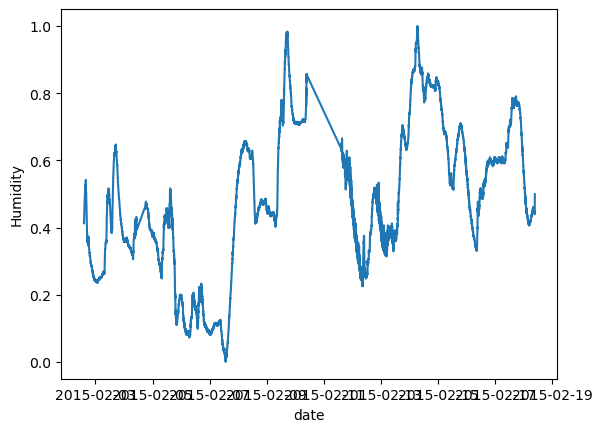

In [14]:
plt.xlabel('date')
plt.ylabel("Humidity")
plt.plot(data1)

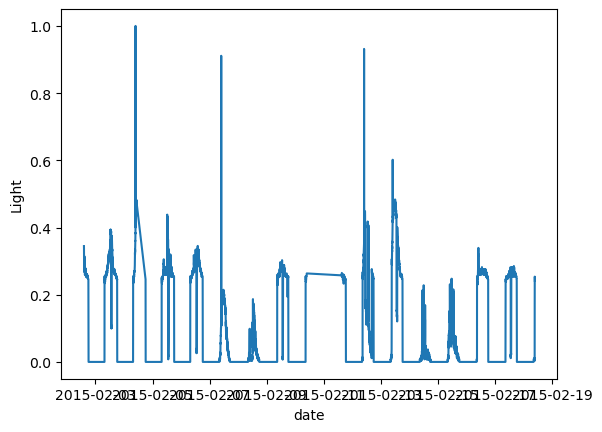

In [15]:
plt.xlabel('date')
plt.ylabel("Light")
plt.plot(data2)

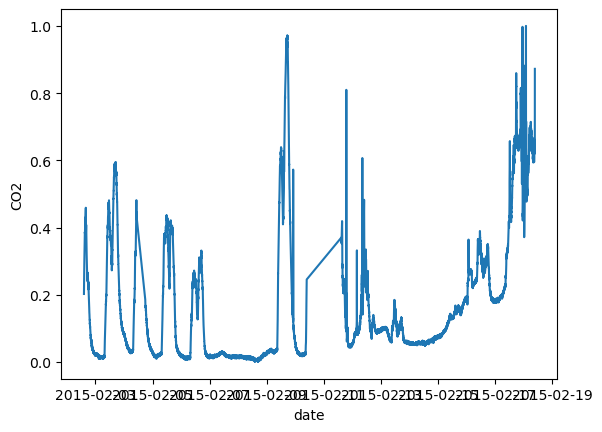

In [16]:
plt.xlabel('date')
plt.ylabel("CO2")
plt.plot(data3)

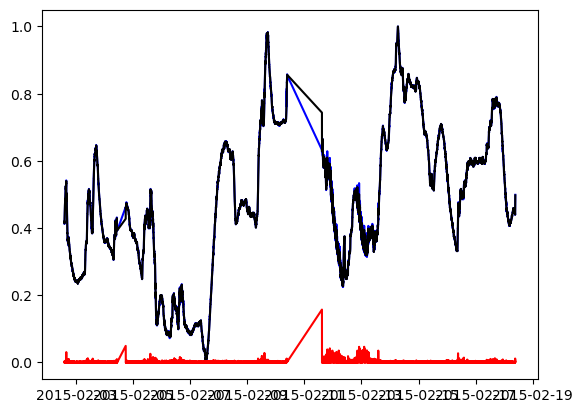

In [17]:
rol_mean = data1.rolling(window=12).mean()
rol_sd = data1.rolling(window=12).std()

plt.plot(data1,c="blue")
plt.plot(rol_mean,c="black")
plt.plot(rol_sd,c="red")

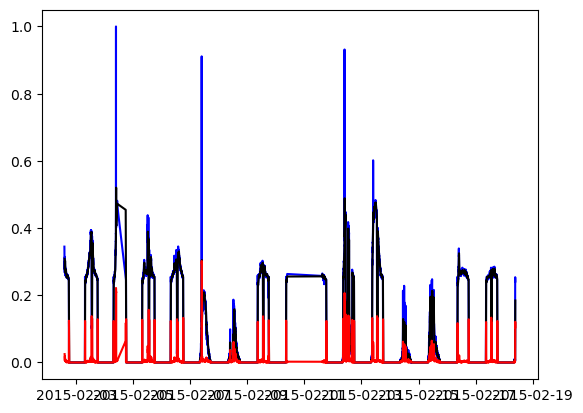

In [18]:
rol_mean = data2.rolling(window=12).mean()
rol_sd = data2.rolling(window=12).std()

plt.plot(data2,c="blue")
plt.plot(rol_mean,c="black")
plt.plot(rol_sd,c="red")

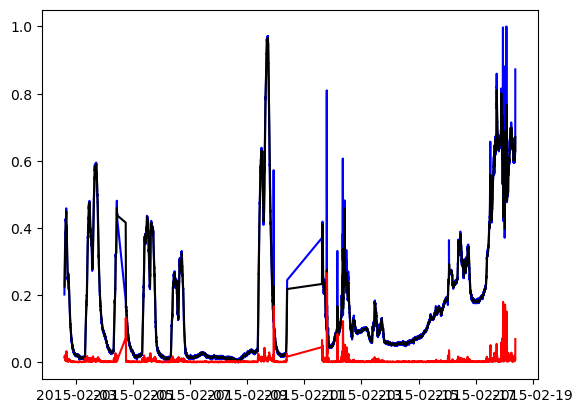

In [19]:
rol_mean = data3.rolling(window=12).mean()
rol_sd = data3.rolling(window=12).std()

plt.plot(data3,c="blue")
plt.plot(rol_mean,c="black")
plt.plot(rol_sd,c="red")

In [20]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1["Humidity"])
print(adftest)

(-2.370583938512796, 0.15021155107614914, 44, 20515, {'1%': -3.43066879690077, '5%': -2.861680897220605, '10%': -2.566844995706761}, -158970.8334688504)


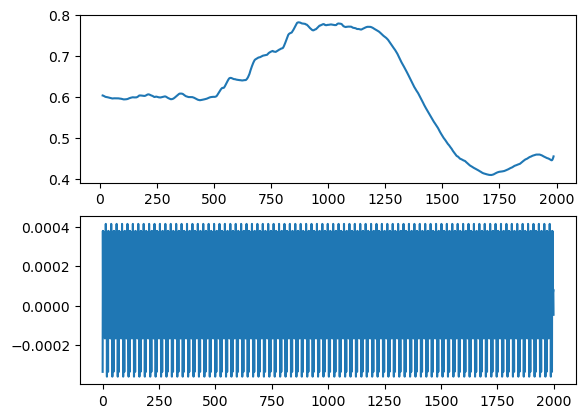

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data1.iloc[-2000:].values,model='Additive'
                               ,period=24)

trend=decompose.trend
season=decompose.seasonal

#subplot plots two graphs in one image
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [22]:
data1_new = data1['Humidity']-data1["Humidity"].shift(1)
data1_new

date
2015-02-02 14:19:00         NaN
2015-02-02 14:19:59    0.000791
2015-02-02 14:21:00   -0.002637
2015-02-02 14:22:00   -0.004614
2015-02-02 14:23:00    0.003296
                         ...   
2015-02-18 09:15:00    0.013184
2015-02-18 09:16:00    0.001209
2015-02-18 09:16:59    0.000000
2015-02-18 09:17:59    0.012195
2015-02-18 09:19:00    0.003406
Name: Humidity, Length: 20560, dtype: float64

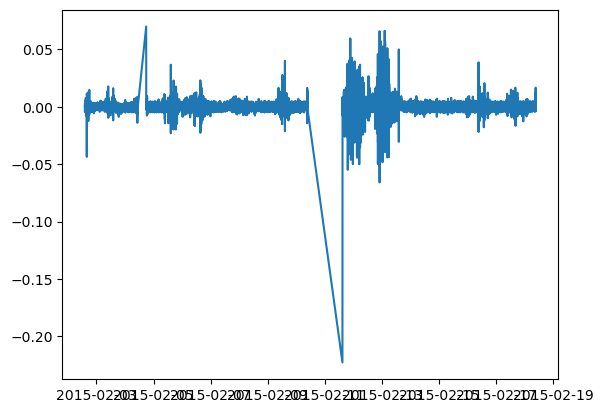

In [23]:
plt.plot(data1_new)

In [24]:
adfuller(data1_new.dropna())

(-14.044589100205128,
 3.2578419625267535e-26,
 43,
 20515,
 {'1%': -3.43066879690077,
  '5%': -2.861680897220605,
  '10%': -2.566844995706761},
 -158958.45052106748)

In [25]:
data1_new = data1['Humidity']-data1["Humidity"].shift(2)
adfuller(data1_new.dropna())

(-13.698818861097896,
 1.3014069897570245e-25,
 46,
 20511,
 {'1%': -3.4306688590794665,
  '5%': -2.8616809246999657,
  '10%': -2.5668450103335236},
 -158481.12561360776)

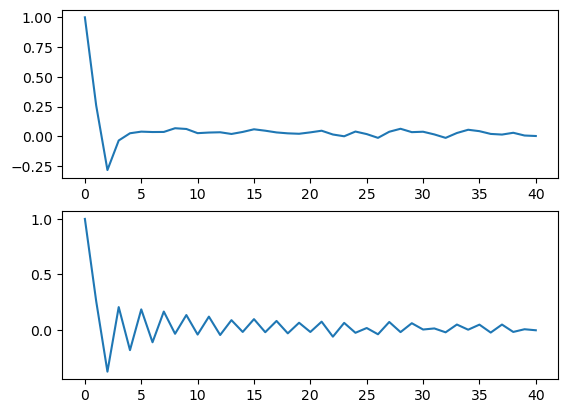

In [26]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(data1_new.dropna())
pacf_plot = pacf(data1_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [27]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data2["Light"])
print(adftest)

(-6.132988262562529, 8.315153188933904e-08, 28, 20531, {'1%': -3.430668548428296, '5%': -2.8616807874102443, '10%': -2.5668449372567093}, -122019.38460600417)


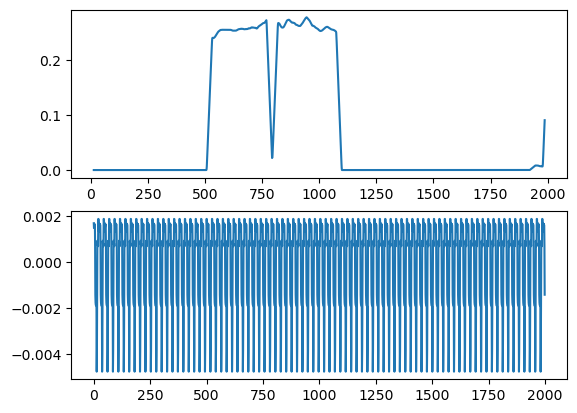

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data2.iloc[-2000:].values,model='Additive',period=24)

trend=decompose.trend
season=decompose.seasonal

#subplot plots two graphs in one image
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [29]:
data2_new = data2["Light"]-data2["Light"].shift(1)
data2_new

date
2015-02-02 14:19:00         NaN
2015-02-02 14:19:59   -0.004006
2015-02-02 14:21:00   -0.003378
2015-02-02 14:22:00   -0.046497
2015-02-02 14:23:00   -0.003034
                         ...   
2015-02-18 09:15:00   -0.000589
2015-02-18 09:16:00   -0.003682
2015-02-18 09:16:59    0.000000
2015-02-18 09:17:59   -0.002799
2015-02-18 09:19:00   -0.005745
Name: Light, Length: 20560, dtype: float64

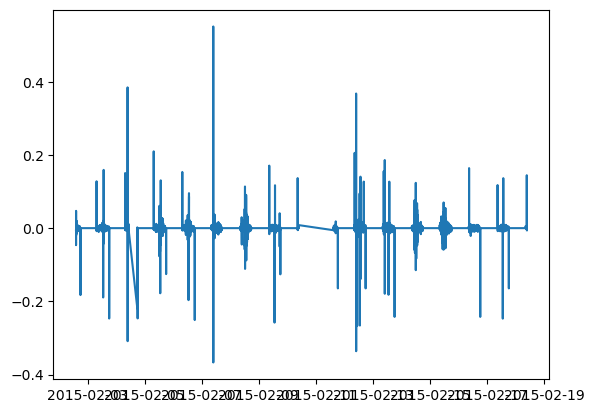

In [30]:
plt.plot(data2_new)

In [31]:
adfuller(data2_new.dropna())

(-31.063672655450752,
 0.0,
 27,
 20531,
 {'1%': -3.430668548428296,
  '5%': -2.8616807874102443,
  '10%': -2.5668449372567093},
 -121977.07348293922)

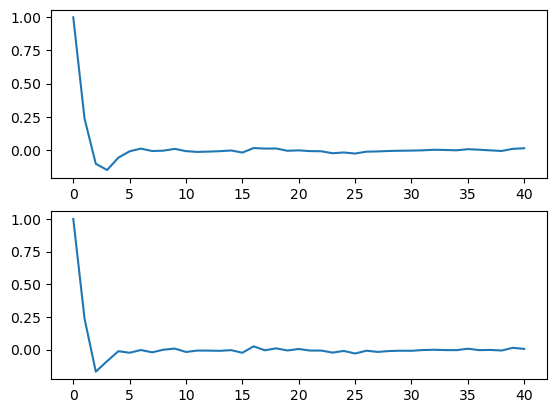

In [32]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(data2_new.dropna())
pacf_plot = pacf(data2_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [33]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data3["CO2"])
print(adftest)

(-2.556927987349511, 0.10223008057023325, 32, 20527, {'1%': -3.430668610510096, '5%': -2.8616808148467845, '10%': -2.566844951860679}, -128957.50360422872)


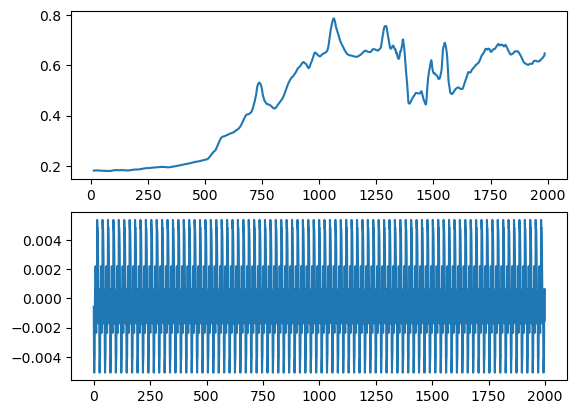

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data3.iloc[-2000:].values,model='Additive',period=24)

trend=decompose.trend
season=decompose.seasonal

#subplot plots two graphs in one image
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [35]:
data3_new = data3["CO2"]-data3["CO2"].shift(1)
data3_new

date
2015-02-02 14:19:00         NaN
2015-02-02 14:19:59    0.006732
2015-02-02 14:21:00    0.005570
2015-02-02 14:22:00    0.003055
2015-02-02 14:23:00    0.002554
                         ...   
2015-02-18 09:15:00   -0.003907
2015-02-18 09:16:00    0.005560
2015-02-18 09:16:59    0.004207
2015-02-18 09:17:59    0.066416
2015-02-18 09:19:00    0.139444
Name: CO2, Length: 20560, dtype: float64

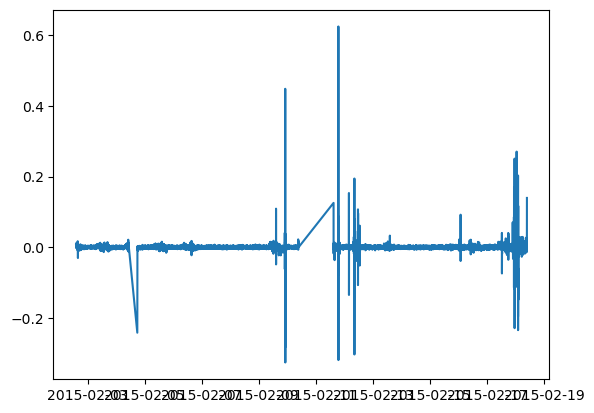

In [36]:
plt.plot(data3_new)

In [37]:
adfuller(data3_new.dropna())

(-22.09402346524025,
 0.0,
 31,
 20527,
 {'1%': -3.430668610510096,
  '5%': -2.8616808148467845,
  '10%': -2.566844951860679},
 -128945.65336783443)

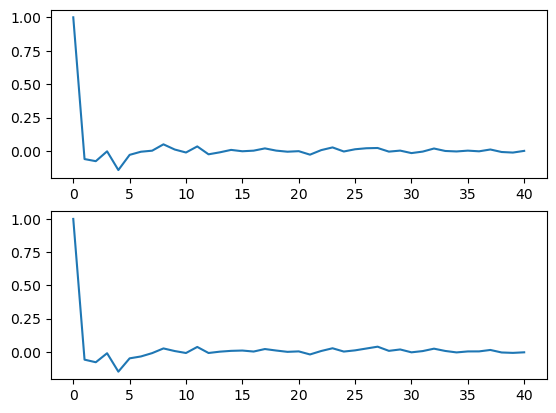

In [38]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(data3_new.dropna())
pacf_plot = pacf(data3_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)